In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Plotting $\hat{m}_{i \to j}(n_i)$

In [2]:
def read_mhat(filename, N):
    """
    Read a file with the messages and return a numpy array with the messages and a nx graph
    """
    with open(filename, 'r') as f:
        lines = f.readlines()

    graph = nx.empty_graph(N, create_using=nx.DiGraph)
    messages = []
    for line in lines:
        parts = line.split()
        index = int(parts[0])
        i, j = (int(x) for x in parts[1][5:].split("to"))
        message = [float(x) for x in parts[2:]]
        messages.append(message)
        graph.add_edge(i, j, index_message=index)

    messages = np.array(messages)
    return messages, graph

In [3]:
def plot_mhat(messages, graph, sel_edges, dn, nmin, npoints):
    vals_n = np.linspace(nmin, nmin + dn * npoints, npoints)
    plt.rcParams['text.usetex'] = True
    for i, j in sel_edges:
        index = graph[i][j]['index_message']
        str_itoj = str(i) + '\to' + str(j)
        plt.plot(vals_n, messages[index], label=r'$\hat{m}_{' + str_itoj + '}(n)$')
    plt.xlabel("n")
    plt.ylabel(r"$\hat{m}_{i\to j}(n_i)$")
    plt.show()

In [4]:
path = "/media/david/Data/UH/Grupo_de_investigacion/Ecology/Results/PBMF/AllData"
T = 0.50
lda = 0.01
av0 = "0.08"
tol = "1.0e-04"
maxiter = 500
eps = 1.00
mu = 0.10
sigma = 0.34
nmin = 0.001
nmin_str = "1.0e-03"
nmax = 3.00
npoints = 300
N = 1000
c = 3
seed = 1

dn = (nmax - nmin) / npoints

filename = f'PBMF_Lotka_Volterra_steady_state_messhat_gr_inside_RRG_T_{"{0:.2f}".format(T)}_lambda_{"{0:.2f}".format(lda)}_av0_{av0}_tol_{tol}_maxiter_{maxiter}_eps_{"{0:.2f}".format(eps)}_mu_{"{0:.2f}".format(mu)}_sigma_{"{0:.2f}".format(sigma)}_nmin_{nmin_str}_nmax_{"{0:.2f}".format(nmax)}_npoints_{npoints}_N_{N}_c_{c}_seed_{seed}.txt'
full_name = path + '/' + filename

In [5]:
messages, graph = read_mhat(full_name, N)

In [6]:
nsamples = 50
sel_edges = []
for i in range(nsamples):
    e = np.random.randint(0, graph.number_of_edges())
    sel_edges.append(list(graph.edges)[e])
print(sel_edges)

[(674, 736), (277, 274), (71, 550), (440, 334), (362, 416), (787, 747), (923, 813), (895, 469), (875, 518), (246, 981), (566, 833), (144, 194), (387, 165), (73, 26), (91, 100), (730, 464), (718, 452), (515, 139), (4, 863), (167, 485), (606, 683), (117, 494), (919, 365), (814, 317), (730, 464), (313, 614), (205, 377), (19, 605), (202, 933), (696, 568), (989, 571), (363, 847), (616, 299), (927, 781), (464, 730), (791, 538), (339, 556), (791, 538), (408, 958), (278, 250), (681, 967), (937, 121), (781, 797), (159, 727), (890, 554), (753, 801), (956, 146), (221, 963), (724, 678), (473, 328)]


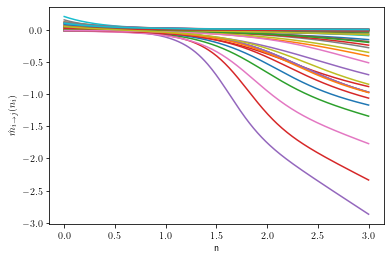

In [7]:
plot_mhat(messages, graph, sel_edges, dn, nmin, npoints)

# Plotting $P(n_i)$

In [8]:
def read_psingle(filename):
    fin = open(filename, 'r')
    lines = fin.readlines()
    p_single = []
    for line in lines:
        parts = line.split()
        p_single.append([float(x) for x in parts[1:]])
    fin.close()
    return np.array(p_single)

In [36]:
def plot_psingle(p_single, sel_nodes, dn, nmin, npoints):
    vals_n = np.linspace(nmin, nmin + dn * npoints, npoints)
    plt.rcParams['text.usetex'] = True
    for i in sel_nodes:
        plt.plot(vals_n, p_single[i], label=r'$P_{' + str(i) + '}(n)$')
    plt.yscale('log')
    plt.ylim(1e-2, 2)
    plt.xlim(0, 3)
    plt.xlabel("n")
    plt.ylabel(r"$P_i(n)$")
    plt.show()

In [38]:
path_psingle = "/media/david/Data/UH/Grupo_de_investigacion/Ecology/Results/PBMF/AllData"
# path_psingle = "./Debug"
T = 0.50
lda = 0.01
av0 = "0.08"
tol = "1.0e-04"
maxiter = 500
eps = 1.00
mu = 0.10
sigma = 0.40
nmin = 0.001
nmin_str = "1.0e-03"
nmax = 3.00
npoints = 300
N = 1000
c = 3
seed = 1

dn = (nmax - nmin) / npoints

filename_psingle = f'PBMF_Lotka_Volterra_steady_state_psingle_gr_inside_RRG_T_{"{0:.2f}".format(T)}_lambda_{"{0:.2f}".format(lda)}_av0_{av0}_tol_{tol}_maxiter_{maxiter}_eps_{"{0:.2f}".format(eps)}_mu_{"{0:.2f}".format(mu)}_sigma_{"{0:.2f}".format(sigma)}_nmin_{nmin_str}_nmax_{"{0:.2f}".format(nmax)}_npoints_{npoints}_N_{N}_c_{c}_seed_{seed}.txt'
full_name_psingle = path_psingle + '/' + filename_psingle

In [39]:
p_single = read_psingle(full_name_psingle)

In [40]:
nsamples_psingle = 50
sel_nodes = np.random.randint(0, N, nsamples_psingle)

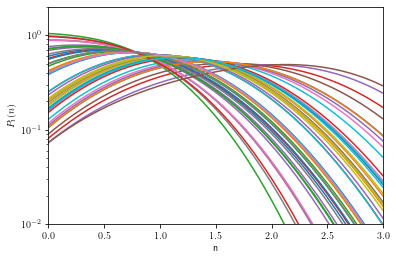

In [41]:
plot_psingle(p_single, sel_nodes, dn, nmin, npoints)